In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/walmart-sales-forecast/features.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd_features = pd.read_csv('/kaggle/input/walmart-sales-forecast/features.csv')

In [4]:
pd_features

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [5]:
pd_stores = pd.read_csv('/kaggle/input/walmart-sales-forecast/stores.csv')

In [6]:
pd_stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [7]:
pd_test = pd.read_csv('/kaggle/input/walmart-sales-forecast/test.csv')

In [8]:
pd_test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [9]:
pd_train = pd.read_csv('/kaggle/input/walmart-sales-forecast/train.csv')

In [10]:
pd_train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


**Visualization**

In [11]:
pd_features

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


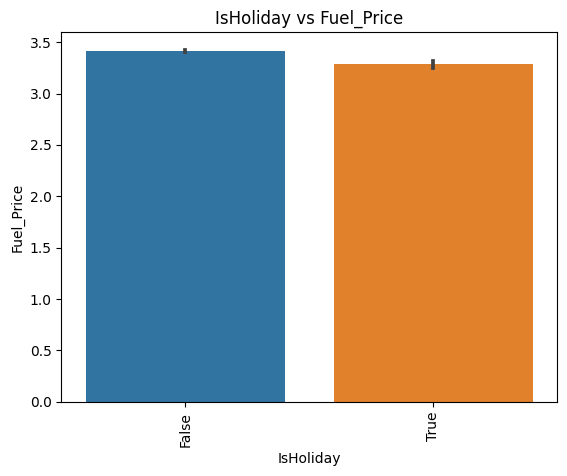

<Figure size 2000x3200 with 0 Axes>

In [12]:
sns.barplot(data=pd_features, x='IsHoliday', y='Fuel_Price')

# Show the plot
plt.title("IsHoliday vs Fuel_Price")
plt.xticks(rotation=90)
plt.figure(figsize=(20, 32))
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


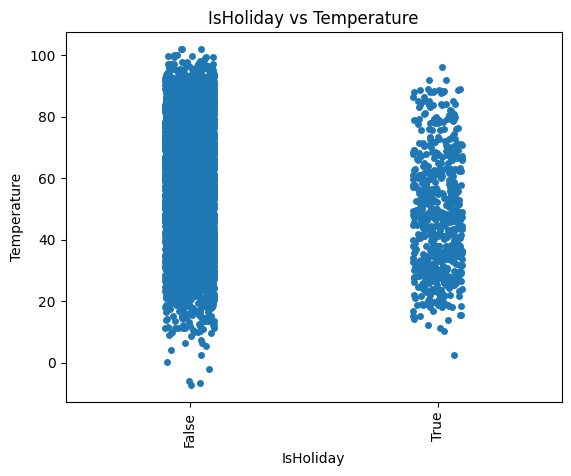

<Figure size 2000x3200 with 0 Axes>

In [13]:
sns.stripplot(data=pd_features, x='IsHoliday', y='Temperature')

# Show the plot
plt.title("IsHoliday vs Temperature")
plt.xticks(rotation=90)
plt.figure(figsize=(20, 32))
plt.show()

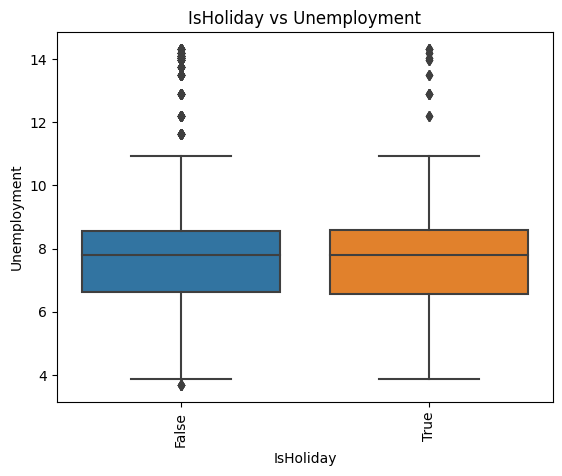

<Figure size 2000x3200 with 0 Axes>

In [14]:
sns.boxplot(data=pd_features, x='IsHoliday', y='Unemployment')

# Show the plot
plt.title("IsHoliday vs Unemployment")
plt.xticks(rotation=90)
plt.figure(figsize=(20, 32))
plt.show()

In [15]:
from prophet import Prophet

In [16]:
pd_features

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [17]:
pd_features_prophet = pd_features[['Date','Unemployment']]

In [18]:
pd_features_prophet

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Date,Unemployment
0,2010-02-05,8.106
1,2010-02-12,8.106
2,2010-02-19,8.106
3,2010-02-26,8.106
4,2010-03-05,8.106
...,...,...
8185,2013-06-28,NaN
8186,2013-07-05,NaN
8187,2013-07-12,NaN
8188,2013-07-19,NaN


In [19]:
pd_features_prophet = pd_features_prophet.rename(columns={'Date':'ds', 'Unemployment':'y'})


In [20]:
pd_features_prophet

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,ds,y
0,2010-02-05,8.106
1,2010-02-12,8.106
2,2010-02-19,8.106
3,2010-02-26,8.106
4,2010-03-05,8.106
...,...,...
8185,2013-06-28,NaN
8186,2013-07-05,NaN
8187,2013-07-12,NaN
8188,2013-07-19,NaN


In [21]:
m = Prophet()
m.fit(pd_features_prophet)

09:46:41 - cmdstanpy - INFO - Chain [1] start processing
09:46:42 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [23]:
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [24]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,8.634689,6.230252,10.906946,8.634689,8.634689,-0.026834,-0.026834,-0.026834,-0.026834,-0.026834,-0.026834,0.0,0.0,0.0,8.607856
1,2010-02-12,8.628451,6.282524,10.973390,8.628451,8.628451,-0.017137,-0.017137,-0.017137,-0.017137,-0.017137,-0.017137,0.0,0.0,0.0,8.611314
2,2010-02-19,8.622213,6.413765,10.984110,8.622213,8.622213,-0.017614,-0.017614,-0.017614,-0.017614,-0.017614,-0.017614,0.0,0.0,0.0,8.604598
3,2010-02-26,8.615974,6.287676,10.718649,8.615974,8.615974,-0.010700,-0.010700,-0.010700,-0.010700,-0.010700,-0.010700,0.0,0.0,0.0,8.605274
4,2010-03-05,8.609736,6.418819,10.841548,8.609736,8.609736,0.010664,0.010664,0.010664,0.010664,0.010664,0.010664,0.0,0.0,0.0,8.620400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,2014-07-22,5.739112,3.377934,7.988273,5.678466,5.797620,-0.027441,-0.027441,-0.027441,-0.027441,-0.027441,-0.027441,0.0,0.0,0.0,5.711671
543,2014-07-23,5.737003,3.405766,7.939324,5.675838,5.795854,-0.025280,-0.025280,-0.025280,-0.025280,-0.025280,-0.025280,0.0,0.0,0.0,5.711723
544,2014-07-24,5.734894,3.558987,7.978757,5.673405,5.794073,-0.022840,-0.022840,-0.022840,-0.022840,-0.022840,-0.022840,0.0,0.0,0.0,5.712055
545,2014-07-25,5.732786,3.330290,8.050018,5.671017,5.792289,-0.020152,-0.020152,-0.020152,-0.020152,-0.020152,-0.020152,0.0,0.0,0.0,5.712633


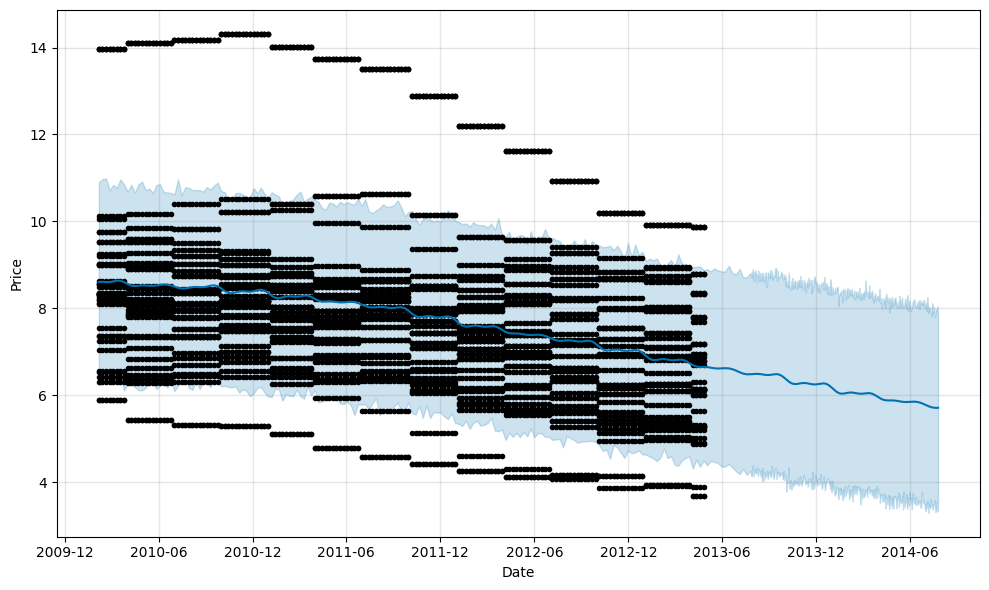

In [25]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

/tmp/ipykernel_13/2431557905.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


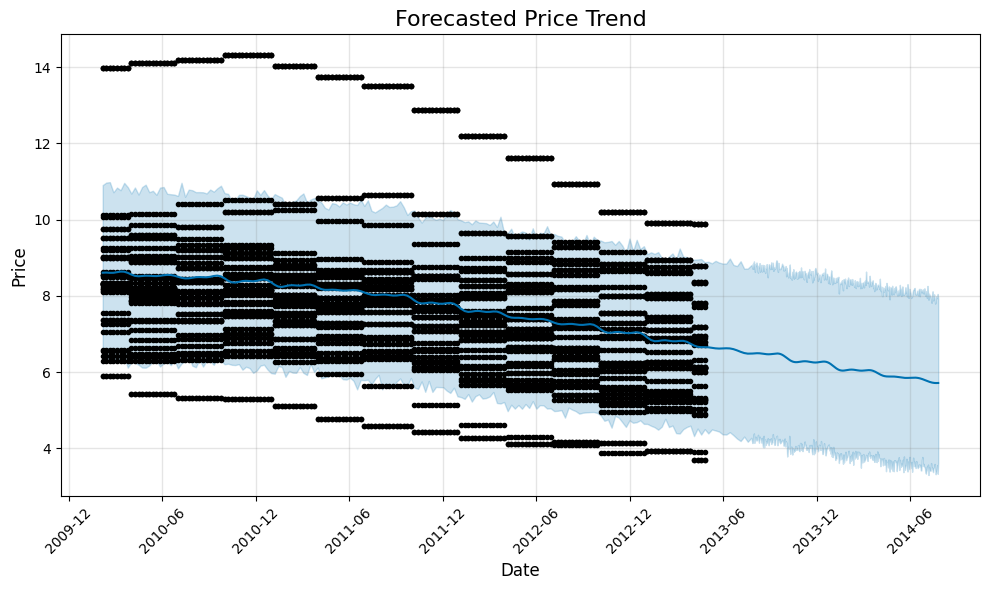

In [26]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')
plt.title('Forecasted Price Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

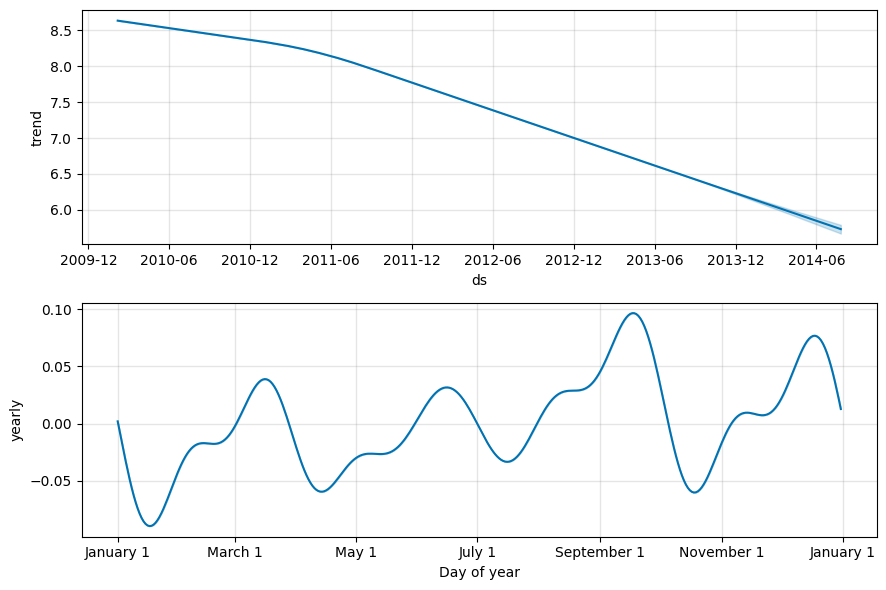

In [27]:
figure3 = m.plot_components(forecast)

In [28]:
from prophet.plot import add_changepoints_to_plot

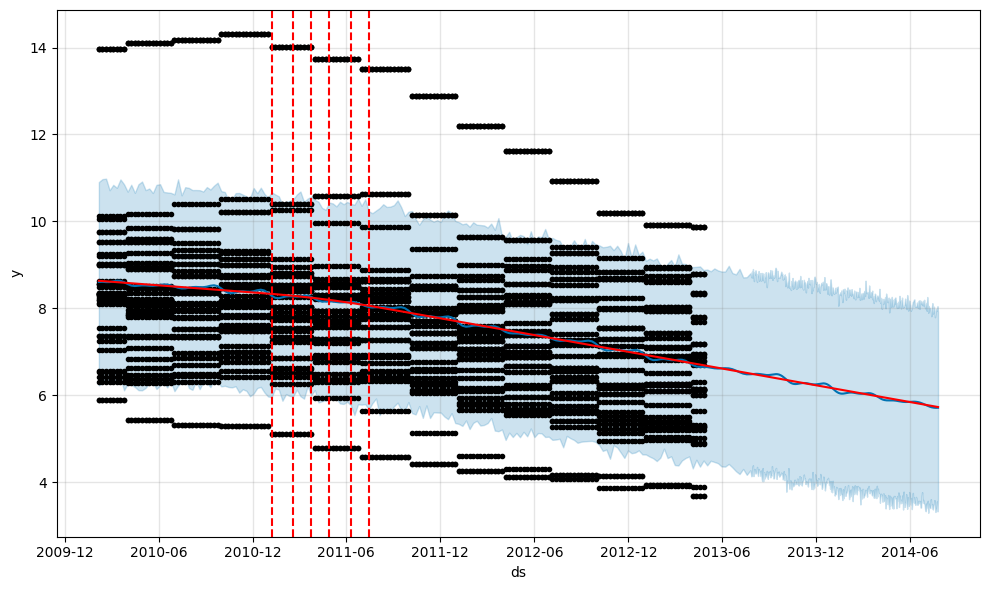

In [29]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)